In [39]:
import numpy as np
import pandas as pd


In [40]:
chilly=pd.read_excel('temp_chilly.xlsx')
chilly['DateTime']=pd.to_datetime(chilly['DateTime'])

corbeil=pd.read_excel('temp_corbeil.xlsx')
corbeil['DateTime']=pd.to_datetime(corbeil['DateTime'])

corbeil.rename(columns={
    'Rooftop 1 restaurant  T2 (Wh)': 'Rooftop1_Corbeil'
}, inplace=True)

montgeron=pd.read_excel('temp_montgeron.xlsx')
montgeron['DateTime']=pd.to_datetime(montgeron['DateTime'])

villabe=pd.read_excel('temp_villabe.xlsx')
villabe['DateTime']=pd.to_datetime(villabe['DateTime'])

arpajon=pd.read_excel('temp_arpajon.xlsx')
arpajon['DateTime']=pd.to_datetime(arpajon['DateTime'])

outside_temp=pd.read_excel('outside_temp_chilly.xlsx')


In [41]:
chilly.head()

,DateTime,Clim zone jeux (Wh),Extracteur 2 (Wh),Extracteur cuisine (Wh),Extraction annexes VE02 (Wh),Rooftop 1 restaurant (Wh),Rooftop 2 cuisine (Wh)
0,2023-01-01,4643.70,9570.27,0.0,11550.60,66874.80,138420.9
1,2023-01-02,4643.70,9377.13,0.0,11633.40,101098.80,139587.0
2,2023-01-03,4643.70,9328.80,0.0,11598.87,160052.40,141029.1
3,2023-01-04,4643.70,9446.07,0.0,11543.73,71870.37,138676.2
4,2023-01-05,4664.37,9542.73,0.0,11640.27,68903.43,138558.9


In [42]:
chilly['Rooftop_chilly']=chilly['Rooftop 1 restaurant (Wh)']+chilly['Rooftop 2 cuisine (Wh)']

In [43]:
rooftop=chilly[['DateTime','Rooftop_chilly']]
rooftop

,DateTime,Rooftop_chilly
0,2023-01-01,205295.70
1,2023-01-02,240685.80
2,2023-01-03,301081.50
3,2023-01-04,210546.57
4,2023-01-05,207462.33
...,...,...
360,2023-12-27,150468.30
361,2023-12-28,144375.60
362,2023-12-29,147956.70
363,2023-12-30,158948.40


In [44]:
corbeil.head()

,DateTime,Rooftop 1 restaurant T2 (Wh),Rooftop 2 cuisine T3 (Wh)
0,2023-01-01,20755.97,0.00
1,2023-01-02,46656.12,0.00
2,2023-01-03,58087.65,0.00
3,2023-01-04,33140.49,2.29
4,2023-01-05,25859.89,0.00


In [45]:
corbeil

,DateTime,Rooftop 1 restaurant T2 (Wh),Rooftop 2 cuisine T3 (Wh)
0,2023-01-01,20755.97,0.00
1,2023-01-02,46656.12,0.00
2,2023-01-03,58087.65,0.00
3,2023-01-04,33140.49,2.29
4,2023-01-05,25859.89,0.00
...,...,...,...
360,2023-12-27,96528.70,9076.61
361,2023-12-28,81362.50,9076.46
362,2023-12-29,84039.70,9104.26
363,2023-12-30,88945.60,9111.10


In [47]:
corbeil['Rooftop_corbeil']=corbeil[corbeil.columns[1]]+corbeil[corbeil.columns[2]]

In [48]:
rooftop = pd.merge(rooftop, corbeil[['DateTime','Rooftop_corbeil']],on='DateTime',how='left')
rooftop

,DateTime,Rooftop_chilly,Rooftop_corbeil
0,2023-01-01,205295.70,20755.97
1,2023-01-02,240685.80,46656.12
2,2023-01-03,301081.50,58087.65
3,2023-01-04,210546.57,33142.78
4,2023-01-05,207462.33,25859.89
...,...,...,...
360,2023-12-27,150468.30,105605.31
361,2023-12-28,144375.60,90438.96
362,2023-12-29,147956.70,93143.96
363,2023-12-30,158948.40,98056.70


In [49]:
arpajon.head()

,DateTime,Rooftop 1 M3 S5 (Wh),Rooftop 2 M4 S6 (Wh)
0,2023-01-17,207407.10,917.7
1,2023-01-18,252291.06,31167.3
2,2023-01-19,284556.00,35845.5
3,2023-01-20,250511.40,27648.3
4,2023-01-21,262386.30,14048.4


In [50]:
arpajon['Rooftop_arpajon']=arpajon[arpajon.columns[1]]+arpajon[arpajon.columns[2]]
rooftop = pd.merge(rooftop, arpajon[['DateTime','Rooftop_arpajon']],on='DateTime',how='left')
rooftop

,DateTime,Rooftop_chilly,Rooftop_corbeil,Rooftop_arpajon
0,2023-01-01,205295.70,20755.97,NaN
1,2023-01-02,240685.80,46656.12,NaN
2,2023-01-03,301081.50,58087.65,NaN
3,2023-01-04,210546.57,33142.78,NaN
4,2023-01-05,207462.33,25859.89,NaN
...,...,...,...,...
360,2023-12-27,150468.30,105605.31,174107.7
361,2023-12-28,144375.60,90438.96,128264.1
362,2023-12-29,147956.70,93143.96,113442.9
363,2023-12-30,158948.40,98056.70,140725.5


In [51]:
arpajon

,DateTime,Rooftop 1 M3 S5 (Wh),Rooftop 2 M4 S6 (Wh),Rooftop_arpajon
0,2023-01-17,207407.10,917.7,208324.80
1,2023-01-18,252291.06,31167.3,283458.36
2,2023-01-19,284556.00,35845.5,320401.50
3,2023-01-20,250511.40,27648.3,278159.70
4,2023-01-21,262386.30,14048.4,276434.70
...,...,...,...,...
344,2023-12-27,145003.50,29104.2,174107.70
345,2023-12-28,100360.50,27903.6,128264.10
346,2023-12-29,85297.80,28145.1,113442.90
347,2023-12-30,111897.30,28828.2,140725.50


In [52]:
montgeron

,DateTime,Climatisation Cuisine T1 (Wh),Rooftop Restaurant S1 (Wh),Rooftop S1 (Wh)
0,2023-01-16,49965.63,117438.00,39146.00
1,2023-01-17,71711.13,237725.28,79241.76
2,2023-01-18,81351.87,204985.20,68328.40
3,2023-01-19,78003.78,268272.00,89424.00
4,2023-01-20,84604.17,187445.40,62481.80
...,...,...,...,...
345,2023-12-27,3160.20,2442.60,814.20
346,2023-12-28,3263.70,2435.70,811.90
347,2023-12-29,3270.60,2442.57,814.19
348,2023-12-30,3229.20,2449.50,816.50


In [55]:
montgeron['Rooftop_montgeron']=montgeron[montgeron.columns[1]]+montgeron[montgeron.columns[2]]
rooftop = pd.merge(rooftop, montgeron[['DateTime','Rooftop_montgeron']],on='DateTime',how='left')
rooftop

,DateTime,Rooftop_chilly,Rooftop_corbeil,Rooftop_arpajon,Rooftop_montgeron
0,2023-01-01,205295.70,20755.97,NaN,NaN
1,2023-01-02,240685.80,46656.12,NaN,NaN
2,2023-01-03,301081.50,58087.65,NaN,NaN
3,2023-01-04,210546.57,33142.78,NaN,NaN
4,2023-01-05,207462.33,25859.89,NaN,NaN
...,...,...,...,...,...
360,2023-12-27,150468.30,105605.31,174107.7,5602.80
361,2023-12-28,144375.60,90438.96,128264.1,5699.40
362,2023-12-29,147956.70,93143.96,113442.9,5713.17
363,2023-12-30,158948.40,98056.70,140725.5,5678.70


In [58]:
villabe['Rooftop_villabe']=villabe[villabe.columns[2]]+villabe[villabe.columns[3]]
rooftop = pd.merge(rooftop, villabe[['DateTime','Rooftop_villabe']],on='DateTime',how='left')
rooftop

,DateTime,Rooftop_chilly,Rooftop_corbeil,Rooftop_arpajon,Rooftop_montgeron,Rooftop_villabe
0,2023-01-01,205295.70,20755.97,NaN,NaN,NaN
1,2023-01-02,240685.80,46656.12,NaN,NaN,NaN
2,2023-01-03,301081.50,58087.65,NaN,NaN,NaN
3,2023-01-04,210546.57,33142.78,NaN,NaN,NaN
4,2023-01-05,207462.33,25859.89,NaN,NaN,NaN
...,...,...,...,...,...,...
360,2023-12-27,150468.30,105605.31,174107.7,5602.80,141898.50
361,2023-12-28,144375.60,90438.96,128264.1,5699.40,127007.46
362,2023-12-29,147956.70,93143.96,113442.9,5713.17,160271.85
363,2023-12-30,158948.40,98056.70,140725.5,5678.70,120570.60


# Comparing Energy consumption of the restaurants

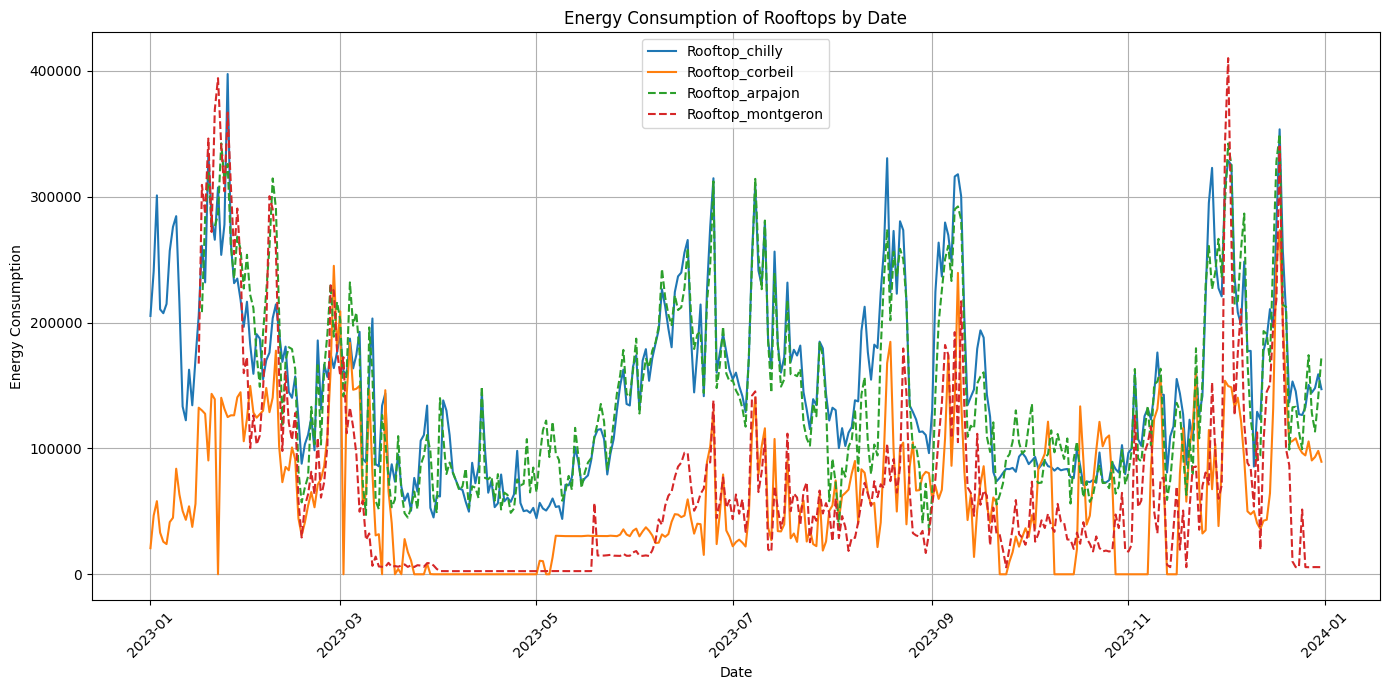

In [107]:
import matplotlib.pyplot as plt
# Plotting the data
plt.figure(figsize=(14, 7))

plt.plot(rooftop["DateTime"], rooftop["Rooftop_chilly"], label="Rooftop_chilly")
plt.plot(rooftop["DateTime"], rooftop["Rooftop_corbeil"], label="Rooftop_corbeil")
plt.plot(rooftop["DateTime"], rooftop["Rooftop_arpajon"], label="Rooftop_arpajon", linestyle='--')
plt.plot(rooftop["DateTime"], rooftop["Rooftop_montgeron"], label="Rooftop_montgeron", linestyle='--')


plt.xlabel("Date")
plt.ylabel("Energy Consumption")
plt.title("Energy Consumption of Rooftops by Date")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


#Grouping the data by month

In [61]:
# Convert DateTime column to datetime type
rooftop['DateTime'] = pd.to_datetime(rooftop['DateTime'])

# Group by month and sum the energy consumption
monthly_data = rooftop.resample('M', on='DateTime').sum()

In [62]:
monthly_data

,Rooftop_chilly,Rooftop_corbeil,Rooftop_arpajon,Rooftop_montgeron,Rooftop_villabe
DateTime,,,,,
2023-01-31,7316628.90,2610351.77,4138562.85,4590259.29,2266859.67
2023-02-28,4427895.60,3008254.83,4838989.83,3730629.78,3902626.53
2023-03-31,3444314.40,1710431.85,3260491.50,1103951.64,4618245.90
2023-04-30,2252767.20,9.16,2318406.96,74787.66,4508432.43
2023-05-31,2803338.87,806459.84,3324146.46,284236.38,51102048.60
2023-06-30,5943066.60,1343416.10,5874094.20,1747279.50,6293890.20
2023-07-31,5571677.73,1552255.97,5239901.37,1890475.86,5584121.70
2023-08-31,5307433.11,2386679.40,4144761.03,1825664.10,4248882.00
2023-09-30,4970525.10,1909547.82,4483723.47,2325582.90,3709619.40


In [63]:
monthly_data['Rooftop_corbeil'][3]=(monthly_data['Rooftop_corbeil'][2]+monthly_data['Rooftop_corbeil'][4])/2
monthly_data['Rooftop_montgeron'][3]=(monthly_data['Rooftop_montgeron'][2]+monthly_data['Rooftop_montgeron'][4])/2
monthly_data['Rooftop_villabe'][4]=(monthly_data['Rooftop_villabe'][3]+monthly_data['Rooftop_villabe'][5])/2
monthly_data['Rooftop_villabe'][9]=(monthly_data['Rooftop_villabe'][8]+monthly_data['Rooftop_villabe'][10])/2


In [64]:
# April to June in montgeron - data issue

# Energy consumption with temperature

### Energy Consumption for the 5 restaurants

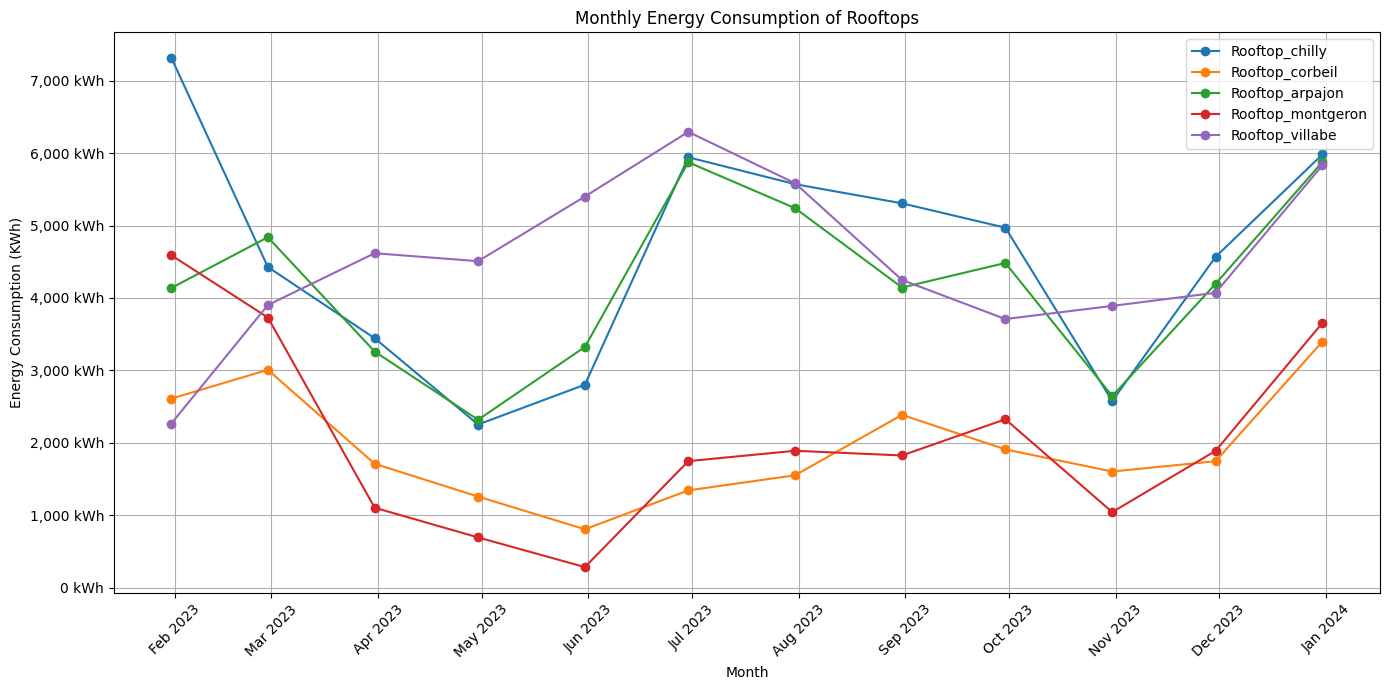

In [65]:
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

monthly_data_kwh = monthly_data /(1000)

# Plotting the data grouped by month
plt.figure(figsize=(14, 7))

plt.plot(monthly_data_kwh.index, monthly_data_kwh["Rooftop_chilly"], label="Rooftop_chilly",marker='o')
plt.plot(monthly_data_kwh.index, monthly_data_kwh["Rooftop_corbeil"], label="Rooftop_corbeil",marker='o')
plt.plot(monthly_data_kwh.index, monthly_data_kwh["Rooftop_arpajon"], label="Rooftop_arpajon",marker='o')
plt.plot(monthly_data_kwh.index, monthly_data_kwh["Rooftop_montgeron"], label="Rooftop_montgeron",marker='o')
plt.plot(monthly_data_kwh.index, monthly_data_kwh["Rooftop_villabe"], label="Rooftop_villabe",marker='o')

plt.xlabel("Month")
plt.ylabel("Energy Consumption (KWh)")
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x:,.0f} kWh'))
# Format x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.title("Monthly Energy Consumption of Rooftops")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [108]:
monthly_data_kwh['Rooftop_corbeil'][3]=(monthly_data_kwh['Rooftop_chilly'][3]+monthly_data_kwh['Rooftop_arpajon'][3]+monthly_data_kwh['Rooftop_villabe'][3])/3


# Cost of Energy Consumption : Monthly Cross Restaurant Analysis


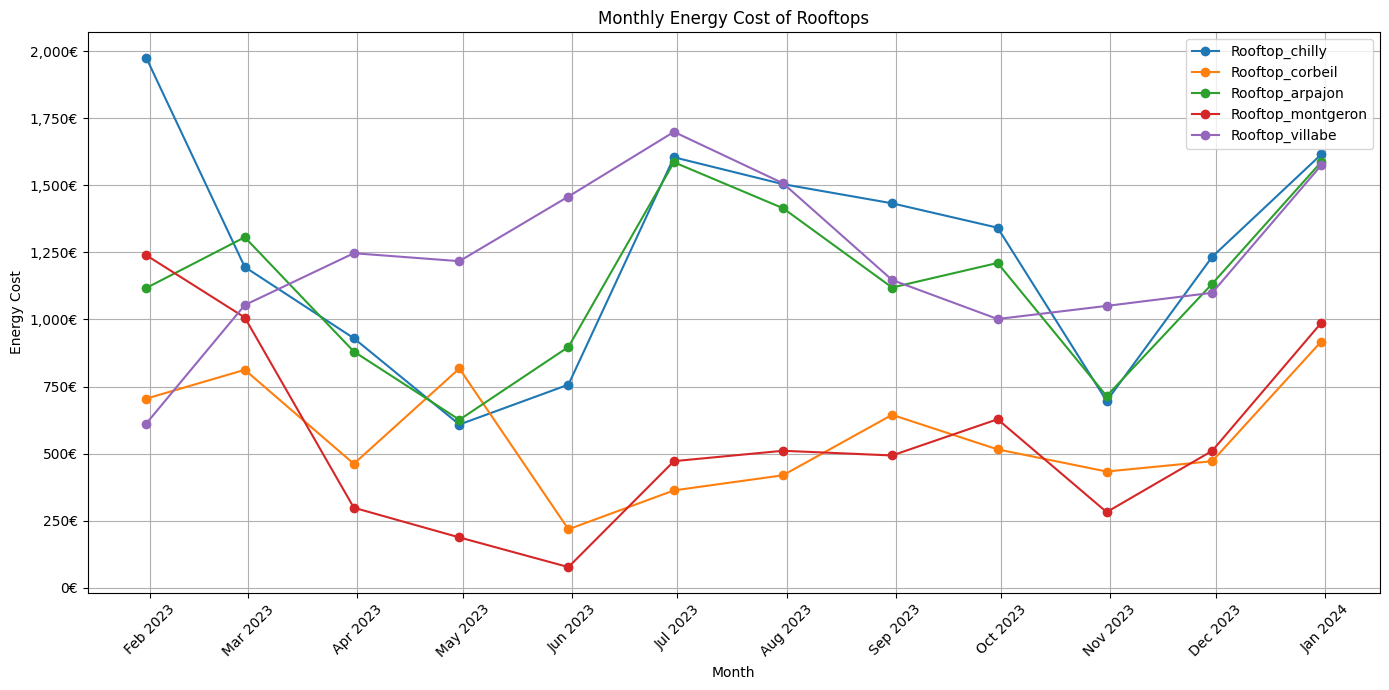

In [70]:

# Calculate the cost of energy consumption
cost_per_kwh = 0.27
monthly_cost = monthly_data_kwh * cost_per_kwh

# Converting energy consumption to cost in thousands of euros for better readability
monthly_cost_euros = monthly_cost

# Plotting the data grouped by month
plt.figure(figsize=(14, 7))

plt.plot(monthly_cost_euros.index, monthly_cost_euros["Rooftop_chilly"], label="Rooftop_chilly", marker='o')
plt.plot(monthly_cost_euros.index, monthly_cost_euros["Rooftop_corbeil"], label="Rooftop_corbeil", marker='o')
plt.plot(monthly_cost_euros.index, monthly_cost_euros["Rooftop_arpajon"], label="Rooftop_arpajon", marker='o')
plt.plot(monthly_cost_euros.index, monthly_cost_euros["Rooftop_montgeron"], label="Rooftop_montgeron", marker='o')
plt.plot(monthly_cost_euros.index, monthly_cost_euros["Rooftop_villabe"], label="Rooftop_villabe", marker='o')

plt.xlabel("Month")
plt.ylabel("Energy Cost")
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}€'))
# Format x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.title("Monthly Energy Cost of Rooftops")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# Energy Consumption : Year 2023 Cross Restaurant Analysis


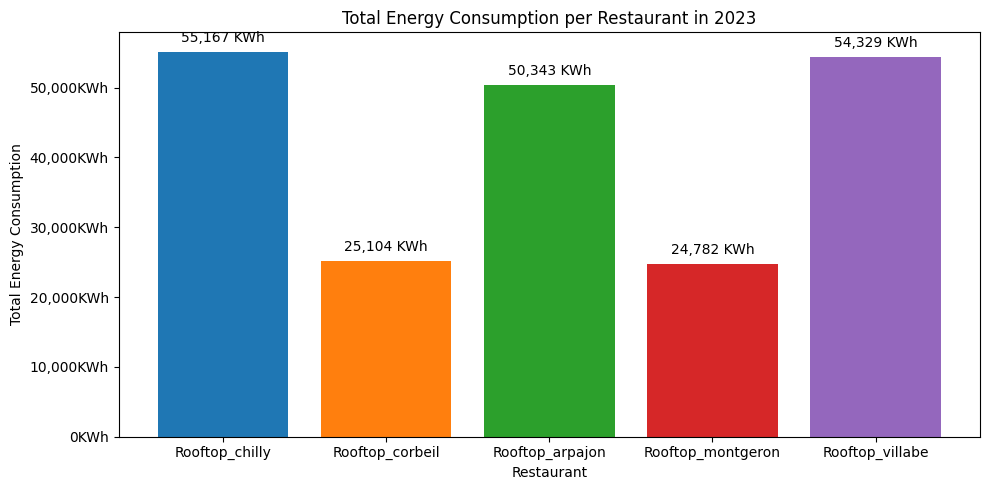

In [91]:

# Calculate the total cost for each restaurant
total_energy_per_restaurant = monthly_data_kwh.sum()

# Define a good color palette
colors = plt.get_cmap('tab10').colors

# Create a bar chart with different colors for each restaurant
plt.figure(figsize=(10, 5))
plt.bar(total_energy_per_restaurant.index, total_energy_per_restaurant.values, color=colors[:len(total_energy_per_restaurant.index)])

# Labeling the axes
plt.xlabel("Restaurant")
plt.ylabel("Total Energy Consumption")
plt.title("Total Energy Consumption per Restaurant in 2023")
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}KWh'))
# Displaying the values on top of the bars
for i, v in enumerate(total_energy_per_restaurant.values):
    plt.text(i, v + 1000, f'{v:,.0f} KWh', ha='center', va='bottom', fontsize=10)


plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# Energy Consumption : Year 2023 Cross Restaurant Analysis


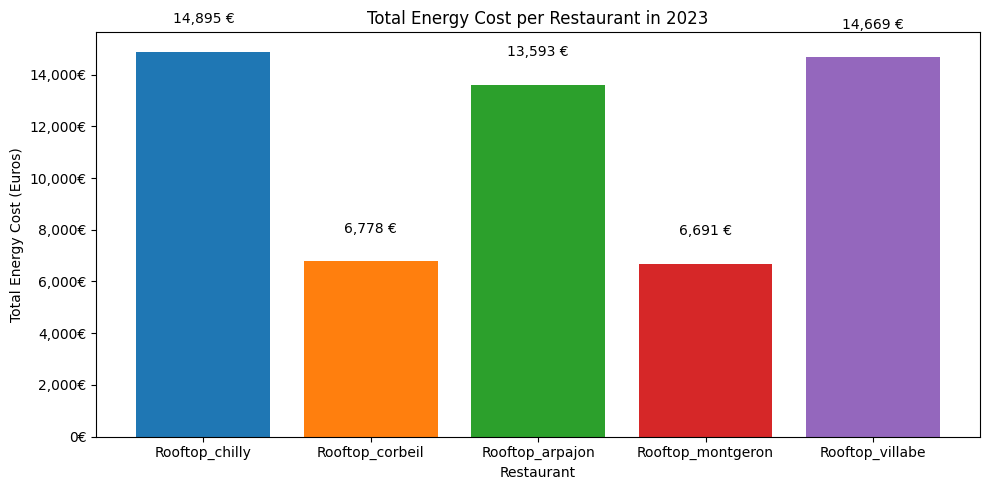

In [73]:

# Calculate the total cost for each restaurant
total_cost_per_restaurant = monthly_cost.sum()

# Define a good color palette
colors = plt.get_cmap('tab10').colors

# Create a bar chart with different colors for each restaurant
plt.figure(figsize=(10, 5))
plt.bar(total_cost_per_restaurant.index, total_cost_per_restaurant.values, color=colors[:len(total_cost_per_restaurant.index)])

# Labeling the axes
plt.xlabel("Restaurant")
plt.ylabel("Total Energy Cost (Euros)")
plt.title("Total Energy Cost per Restaurant in 2023")
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}€'))
# Displaying the values on top of the bars
for i, v in enumerate(total_cost_per_restaurant.values):
    plt.text(i, v + 1000, f'{v:,.0f} €', ha='center', va='bottom', fontsize=10)


plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# Analysis: Off Hours Energy Consumption
## Cross Restaurant Analysis

In [94]:
# Loading and Cleaning Hourly data

hourly_Arpajon=pd.read_excel('Arpajon_hourly.xlsx')
hourly_Arpajon['Rooftop']=hourly_Arpajon['Rooftop 1 M3 S5 (Wh)']+ hourly_Arpajon['Rooftop 2 M4 S6 (Wh)']
hourly_Chilly=pd.read_excel('Chilly_hourly.xlsx')
hourly_Chilly['Rooftop']=hourly_Chilly['Rooftop 1 restaurant (Wh)']+ hourly_Chilly['Rooftop 2 cuisine (Wh)']
hourly_Corbeil=pd.read_excel('Corbeil_hourly.xlsx')
hourly_Corbeil['Rooftop']=hourly_Corbeil['Rooftop 1 restaurant T2 (Wh)']+ hourly_Corbeil['Rooftop 2 cuisine T3 (Wh)']
hourly_Montgeron=pd.read_excel('Montgeron_hourly.xlsx')
hourly_Montgeron['Rooftop']=hourly_Montgeron['Rooftop Restaurant S1 (Wh)']
hourly_Arpajon['DateTime'] = pd.to_datetime(hourly_Arpajon['DateTime'])
hourly_Chilly['DateTime'] = pd.to_datetime(hourly_Chilly['DateTime'])

In [95]:
# Filtering the data for 1AM to 7AM

filtered_Montgeron = hourly_Montgeron[(hourly_Montgeron['DateTime'].dt.hour >= 1) &
                                        (hourly_Montgeron['DateTime'].dt.hour < 7)]
filtered_Corbeil = hourly_Corbeil[(hourly_Corbeil['DateTime'].dt.hour >= 1) &
                                    (hourly_Corbeil['DateTime'].dt.hour < 7)]

filtered_Arpajon = hourly_Arpajon[(hourly_Arpajon['DateTime'].dt.hour >= 1) &
                                        (hourly_Arpajon['DateTime'].dt.hour < 7)]
filtered_Chilly = hourly_Chilly[(hourly_Chilly['DateTime'].dt.hour >= 1) &
                                    (hourly_Chilly['DateTime'].dt.hour < 7)]

In [96]:
filtered_Chilly.head()

,DateTime,Rooftop 1 restaurant (Wh),Rooftop 2 cuisine (Wh),Rooftop
1,2023-01-01 01:00:00,62.1,5727.0,5789.1
2,2023-01-01 02:00:00,62.1,5713.2,5775.3
3,2023-01-01 03:00:00,62.1,5740.8,5802.9
4,2023-01-01 04:00:00,62.1,5747.7,5809.8
5,2023-01-01 05:00:00,62.1,5740.8,5802.9


### Chilly Restaurant

In [113]:
# Defining 'active_nights' df for the nights where energy consumption is greater than 500Wh
active_nights = filtered_Chilly[filtered_Chilly['Rooftop'] > 500].copy()

# Extract date and month from DateTime
active_nights.loc[:, 'Date'] = active_nights['DateTime'].dt.date
active_nights.loc[:, 'Month'] = active_nights['DateTime'].dt.to_period('M')

# Group by Month and count unique dates
monthly_night_activity_Chilly = active_nights.groupby('Month')['Date'].nunique().reset_index().rename(columns={'Date': 'Active Nights Chilly'})

# Display the resulting DataFrame
print(monthly_night_activity_Chilly)


     Month  Active Nights Chilly
0  2023-01                    10


### Corbeil Restaurant

In [112]:
# Defining 'active_nights' df for the nights where energy consumption is greater than 500Wh
active_nights = filtered_Corbeil[filtered_Corbeil['Rooftop'] > 500].copy()

# Extract date and month from DateTime
active_nights.loc[:, 'Date'] = active_nights['DateTime'].dt.date
active_nights.loc[:, 'Month'] = active_nights['DateTime'].dt.to_period('M')

# Group by Month and count unique dates
monthly_night_activity_Corbeil = active_nights.groupby('Month')['Date'].nunique().reset_index().rename(columns={'Date': 'Active Nights Corbeil'})

# Display the resulting DataFrame
print(monthly_night_activity_Corbeil)


      Month  Active Nights Corbeil
0   2023-01                      9
1   2023-02                     24
2   2023-03                     14
3   2023-05                     26
4   2023-06                     18
5   2023-07                      2
6   2023-08                     23
7   2023-09                     15
8   2023-10                     14
9   2023-11                     10
10  2023-12                     23


### Montgeron Restaurant

In [111]:
# Defining 'active_nights' df for the nights where energy consumption is greater than 500Wh
active_nights = filtered_Montgeron[filtered_Montgeron['Rooftop'] > 500].copy()

# Extract date and month from DateTime
active_nights.loc[:, 'Date'] = active_nights['DateTime'].dt.date
active_nights.loc[:, 'Month'] = active_nights['DateTime'].dt.to_period('M')

# Group by Month and count unique dates
monthly_night_activity_Montgeron = active_nights.groupby('Month')['Date'].nunique().reset_index().rename(columns={'Date': 'Active Nights Montgeron'})

# Display the resulting DataFrame
print(monthly_night_activity_Montgeron)


     Month  Active Nights Montgeron
0  2023-01                       13
1  2023-02                       23
2  2023-03                        7
3  2023-10                        3
4  2023-11                        2
5  2023-12                       11


### Arpajon Restaurant

In [110]:
# Defining 'active_nights' df for the nights where energy consumption is greater than 500Wh
active_nights = filtered_Arpajon[filtered_Arpajon['Rooftop'] > 500].copy()

# Extract date and month from DateTime
active_nights.loc[:, 'Date'] = active_nights['DateTime'].dt.date
active_nights.loc[:, 'Month'] = active_nights['DateTime'].dt.to_period('M')

# Group by Month and count unique dates
monthly_night_activity_Arpajon = active_nights.groupby('Month')['Date'].nunique().reset_index().rename(columns={'Date': 'Active Nights Arpajon'})

# Display the resulting DataFrame
print(monthly_night_activity_Arpajon)


Empty DataFrame
Columns: [Month, Active Nights Arpajon]
Index: []


## Night Energy Consumption

In [117]:
monthly_night_activity=pd.merge(monthly_night_activity_Chilly,monthly_night_activity_Corbeil,on='Month',how='outer')
monthly_night_activity=pd.merge(monthly_night_activity,monthly_night_activity_Montgeron,on='Month',how='outer')
monthly_night_activity=pd.merge(monthly_night_activity,monthly_night_activity_Arpajon,on='Month',how='outer')
monthly_night_activity

,Month,Active Nights Chilly,Active Nights Corbeil,Active Nights Montgeron,Active Nights Arpajon
0,2023-01,10.0,9,13.0,NaN
1,2023-02,NaN,24,23.0,NaN
2,2023-03,NaN,14,7.0,NaN
3,2023-05,NaN,26,NaN,NaN
4,2023-06,NaN,18,NaN,NaN
5,2023-07,NaN,2,NaN,NaN
6,2023-08,NaN,23,NaN,NaN
7,2023-09,NaN,15,NaN,NaN
8,2023-10,NaN,14,3.0,NaN
9,2023-11,NaN,10,2.0,NaN


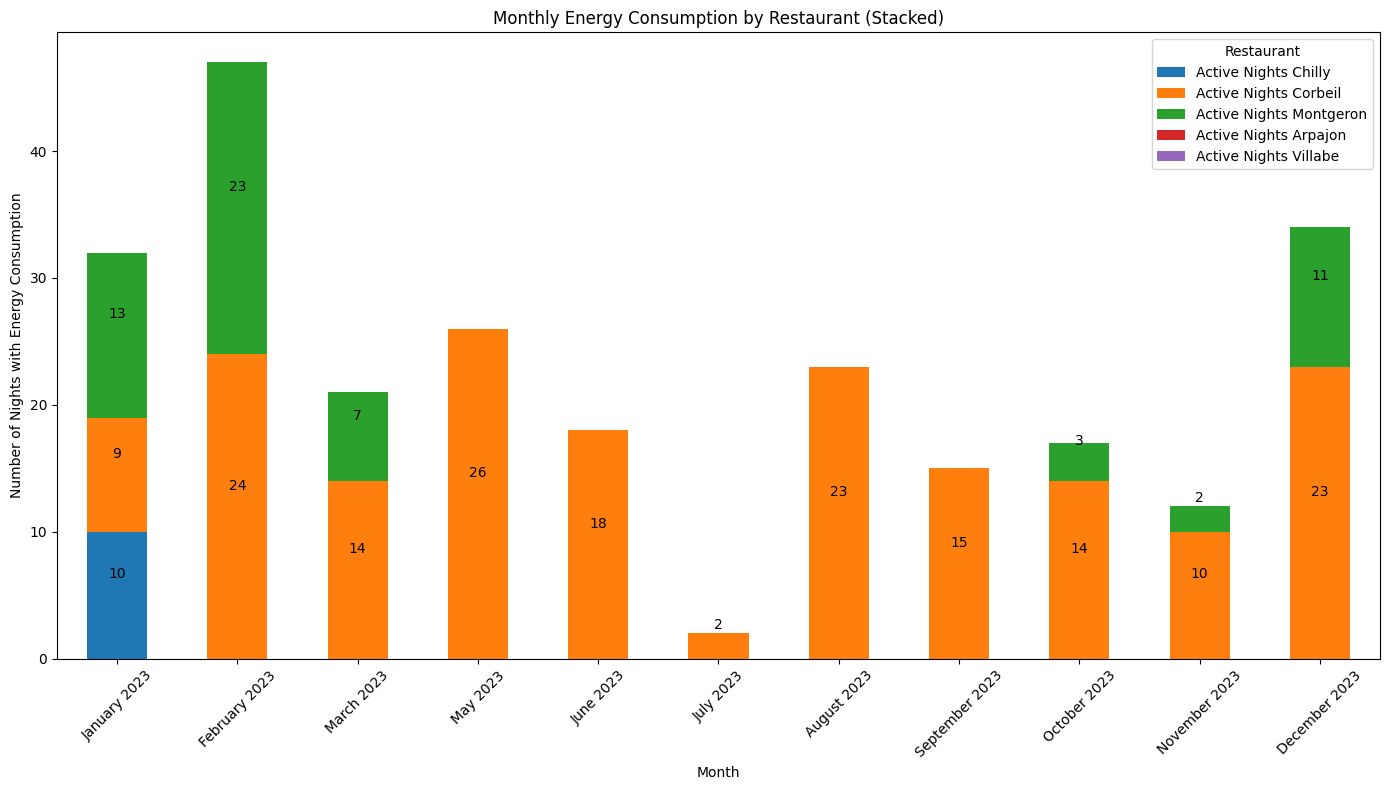

In [123]:
import pandas as pd
import matplotlib.pyplot as plt

# Provided data for monthly night activity
data = {
    'Month': ['2023-01', '2023-02', '2023-03', '2023-05', '2023-06', '2023-07', '2023-08', '2023-09', '2023-10', '2023-11', '2023-12'],
    'Active Nights Chilly': [10.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'Active Nights Corbeil': [9, 24, 14, 26, 18, 2, 23, 15, 14, 10, 23],
    'Active Nights Montgeron': [13.0, 23.0, 7.0, 0, 0, 0, 0, 0, 3.0, 2.0, 11.0],
    'Active Nights Arpajon': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'Active Nights Villabe': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
}

# Creating DataFrame
df = pd.DataFrame(data)
df.set_index('Month', inplace=True)
df.fillna(0, inplace=True)

# Converting index to datetime for better plotting
df.index = pd.to_datetime(df.index + '-01')  # Append '-01' to make it a full date

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))
bars = df.plot(kind='bar', stacked=True, ax=ax)

# Set x-axis labels to full month names
ax.set_xticklabels([date.strftime('%B %Y') for date in df.index], rotation=45)
ax.set_xlabel('Month')
ax.set_ylabel('Number of Nights with Energy Consumption')
ax.set_title('Monthly Energy Consumption by Restaurant (Stacked)')

# Adding number of nights on each bar
for bar_stack in bars.containers:
    for bar in bar_stack:
        height = bar.get_height()
        if height > 0:  # Only display the annotation if there's a visible bar segment
            ax.annotate(f'{int(height)}',  # Ensure the number is displayed as an integer
                        (bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                        textcoords="offset points",  # Positioning the text
                        xytext=(0, 10),  # Distance from the bar
                        ha='center', va='bottom')

ax.legend(title='Restaurant')
plt.tight_layout()
plt.show()


Nightly Consumption of energy is very high for Corbeil. After analyzing, we found that for Corbeil restaurant, fixing their operational efficiency, they can save 15% of their energy spent on heating, which is approximately 3000 euros/year.

# Energy Consumption with Difference of Temperature

In [124]:
rooftop

,DateTime,Rooftop_chilly,Rooftop_corbeil,Rooftop_arpajon,Rooftop_montgeron,Rooftop_villabe
0,2023-01-01,205295.70,20755.97,NaN,NaN,NaN
1,2023-01-02,240685.80,46656.12,NaN,NaN,NaN
2,2023-01-03,301081.50,58087.65,NaN,NaN,NaN
3,2023-01-04,210546.57,33142.78,NaN,NaN,NaN
4,2023-01-05,207462.33,25859.89,NaN,NaN,NaN
...,...,...,...,...,...,...
360,2023-12-27,150468.30,105605.31,174107.7,5602.80,141898.50
361,2023-12-28,144375.60,90438.96,128264.1,5699.40,127007.46
362,2023-12-29,147956.70,93143.96,113442.9,5713.17,160271.85
363,2023-12-30,158948.40,98056.70,140725.5,5678.70,120570.60


In [125]:
diff_temp=pd.read_excel('diff_temp_chilly.xlsx')
diff_temp.head()

,DateTime,outdoor_temp_min,outdoor_temp_avg,outdoor_temp_max,indoor_temp_min,indoor_temp_avg,indoor_temp_max,diff_min,diff_avg,diff_max
0,2022-12-31,13.8,14.9,15.7,18.9,19.2,19.5,5.1,4.3,3.8
1,2023-01-01,11.1,12.9,14.2,18.4,18.9,19.2,7.3,6.0,5.0
2,2023-01-02,6.6,10.5,14.2,17.9,19.0,20.3,11.3,8.5,6.1
3,2023-01-03,5.0,7.2,9.3,15.9,17.8,18.8,10.9,10.6,9.5
4,2023-01-04,9.5,11.2,13.0,17.3,18.5,19.5,7.8,7.3,6.5


In [126]:
rooftop_temperature_compare=pd.merge(rooftop,diff_temp[['DateTime','diff_avg']],on='DateTime',how='left')
rooftop_temperature_compare.head()

,DateTime,Rooftop_chilly,Rooftop_corbeil,Rooftop_arpajon,Rooftop_montgeron,Rooftop_villabe,diff_avg
0,2023-01-01,205295.70,20755.97,NaN,NaN,NaN,6.0
1,2023-01-02,240685.80,46656.12,NaN,NaN,NaN,8.5
2,2023-01-03,301081.50,58087.65,NaN,NaN,NaN,10.6
3,2023-01-04,210546.57,33142.78,NaN,NaN,NaN,7.3
4,2023-01-05,207462.33,25859.89,NaN,NaN,NaN,6.7


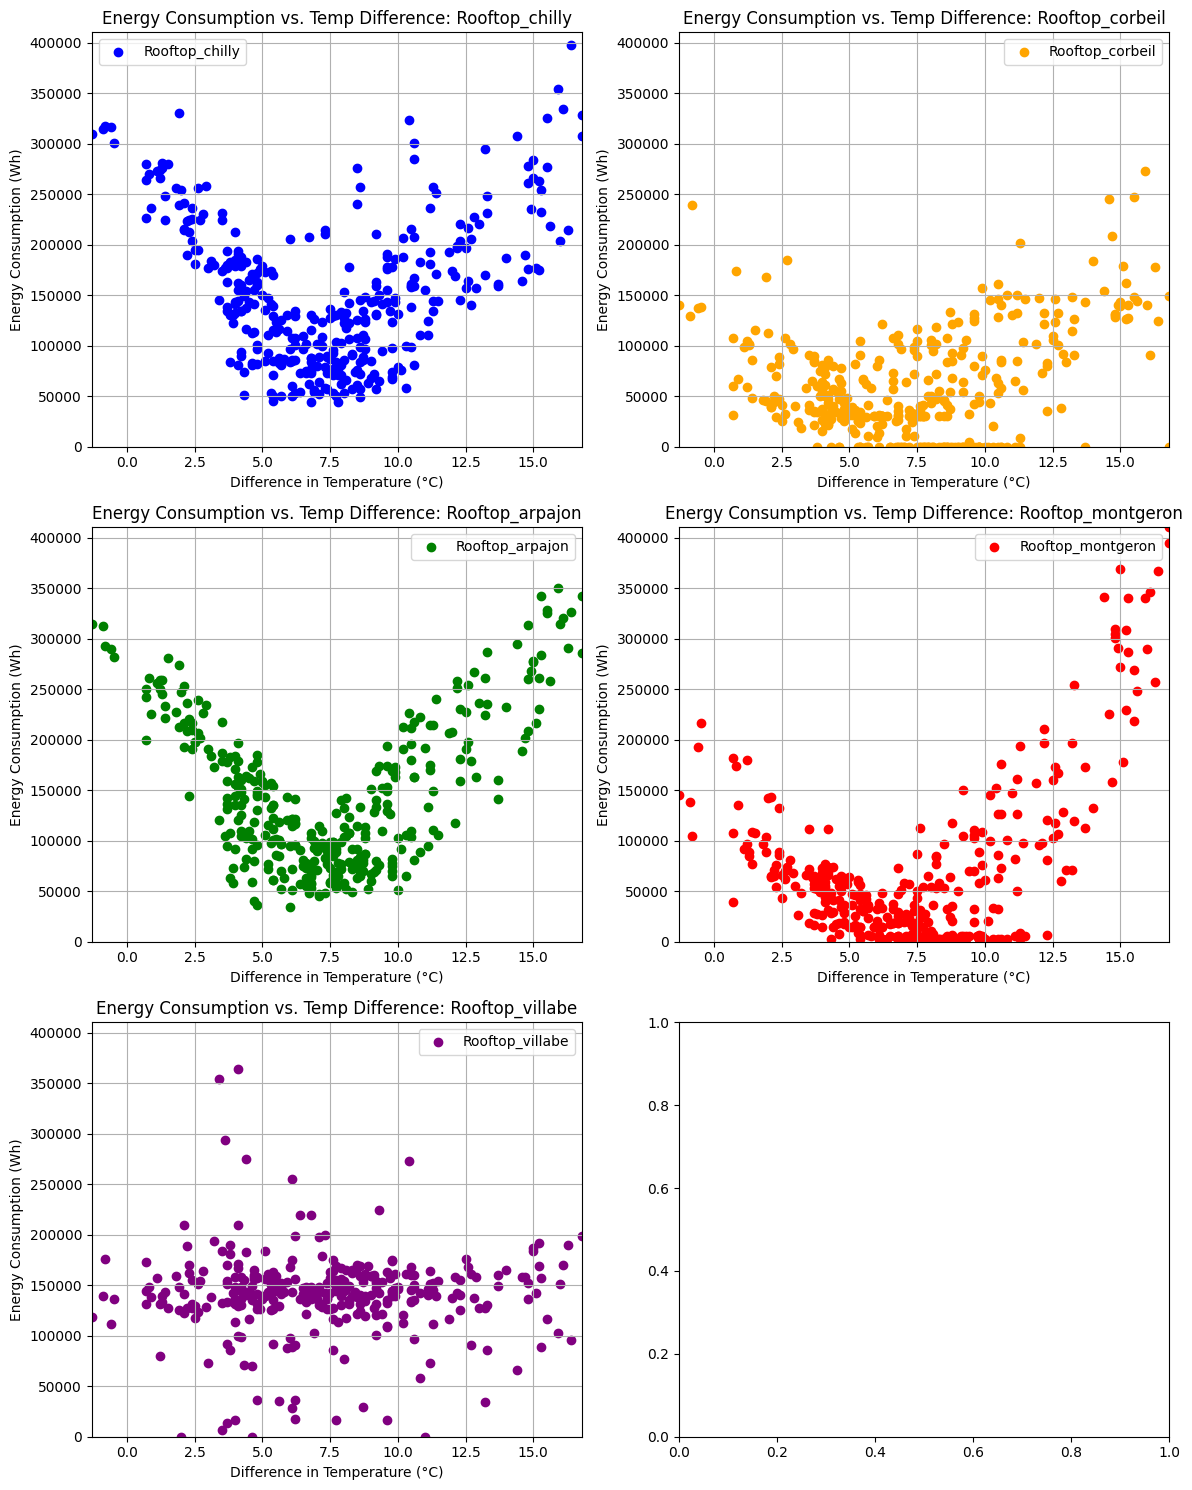

In [128]:

# Create separate plots for each restaurant
restaurants = ['Rooftop_chilly', 'Rooftop_corbeil', 'Rooftop_arpajon', 'Rooftop_montgeron'] #,'Rooftop_villabe']

# Define colors for each restaurant
colors = {'Rooftop_chilly': 'blue', 'Rooftop_corbeil': 'orange', 'Rooftop_arpajon': 'green', 'Rooftop_montgeron': 'red','Rooftop_villabe':'purple'}

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 15))
axes = axes.flatten()  # Flatten the axis array

# Determine the global min and max values for x and y axes
global_min_x = rooftop_temperature_compare['diff_avg'].min()
global_max_x = rooftop_temperature_compare['diff_avg'].max()
global_min_y = rooftop_temperature_compare[['Rooftop_chilly', 'Rooftop_corbeil', 'Rooftop_arpajon', 'Rooftop_montgeron']].min().min()
global_max_y = rooftop_temperature_compare[['Rooftop_chilly', 'Rooftop_corbeil', 'Rooftop_arpajon', 'Rooftop_montgeron']].max().max()

# Plot each restaurant
for i, (restaurant, color) in enumerate(colors.items()):
    ax = axes[i]
    ax.scatter(rooftop_temperature_compare['diff_avg'], rooftop_temperature_compare[restaurant], color=color, label=f'{restaurant}')
    ax.set_title(f'Energy Consumption vs. Temp Difference: {restaurant}')
    ax.set_xlabel('Difference in Temperature (°C)')
    ax.set_ylabel('Energy Consumption (Wh)')
    ax.set_xlim(global_min_x, global_max_x)
    ax.set_ylim(global_min_y, global_max_y)
    ax.legend()
    ax.grid(True)

# Adjust layout to prevent overlap and ensure clarity
plt.tight_layout()
plt.show()

From the above graphs, we can see Chilly and Arpajon follow perfect pattern, while Corbeil and Montgeron have some inconsistencies. Villabe follows a different pattern

For villabe, we attribute this is data error from the sensor, and suggest to look into their sensors.

For corbeil and montgeron, they follow closely the expected pattern, but due to data error, they do not show the exact 'V' pattern.

Therefore, we use Chilly and Arpajon data to provide insights to the managers of all the restaurants.